# Preparataion

In [1]:
import os
import sys
from glob import glob
import requests
import random
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from time import time

from albumentations import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img_path = '/workspace/dataset/mask/resized_data/003101_female_Asian_18/mask4.jpg'
img = np.array(Image.open(img_path))

img_paths = glob(os.path.join('/workspace/dataset/mask/resized_data/', '**/*'))
random.shuffle(img_paths)

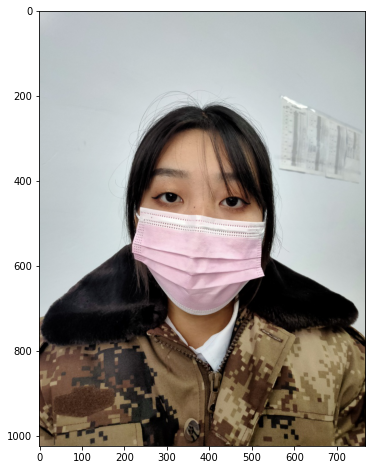

In [3]:
plt.figure(figsize=(16,8))
plt.imshow(img)

# Basic Augmentations

## Flips

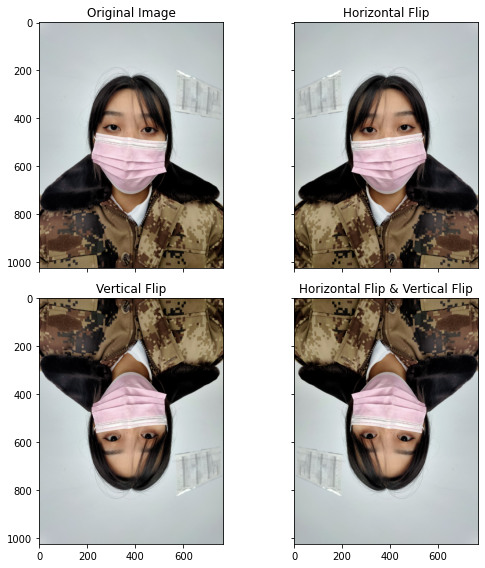

In [4]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

axes[0][0].imshow(img)
axes[0][0].set_title(f'Original Image')

trfm = Compose([
            HorizontalFlip(p=1.0),
        ], p=1.0)
axes[0][1].imshow(trfm(image=img)['image'])
axes[0][1].set_title(f'Horizontal Flip')

trfm = Compose([
            VerticalFlip(p=1.0),
        ], p=1.0)
axes[1][0].imshow(trfm(image=img)['image'])
axes[1][0].set_title(f'Vertical Flip')

trfm = Compose([
            HorizontalFlip(p=1.0),
            VerticalFlip(p=1.0),
        ], p=1.0)
axes[1][1].imshow(trfm(image=img)['image'])
axes[1][1].set_title(f'Horizontal Flip & Vertical Flip')

plt.tight_layout()

## RandomCrop

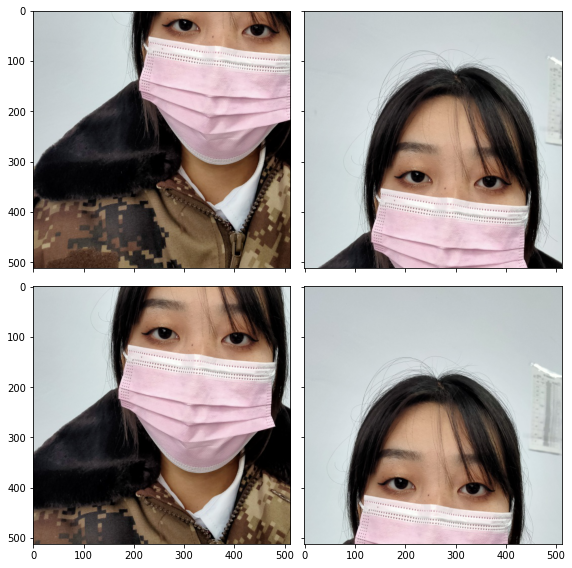

In [5]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            RandomCrop(height=512, width=512, p=1.0),
        ], p=1.0)
for i in range(n_rows*n_cols):
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])

plt.tight_layout()

## Shift, Scale, Rotate

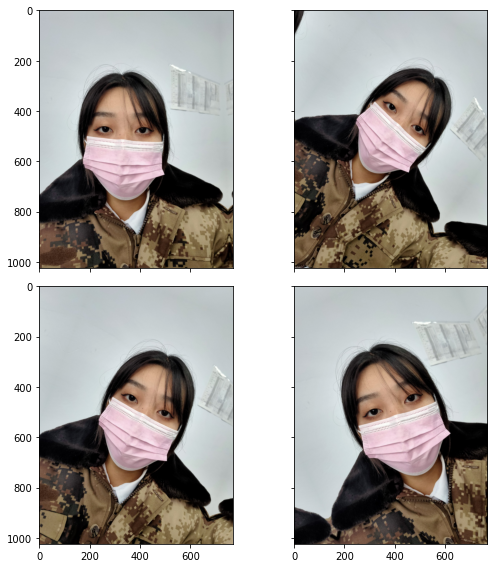

In [6]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            ShiftScaleRotate(p=1.0),
        ], p=1.0)
for i in range(n_rows*n_cols):
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])

plt.tight_layout()

## Brightness, Contrast

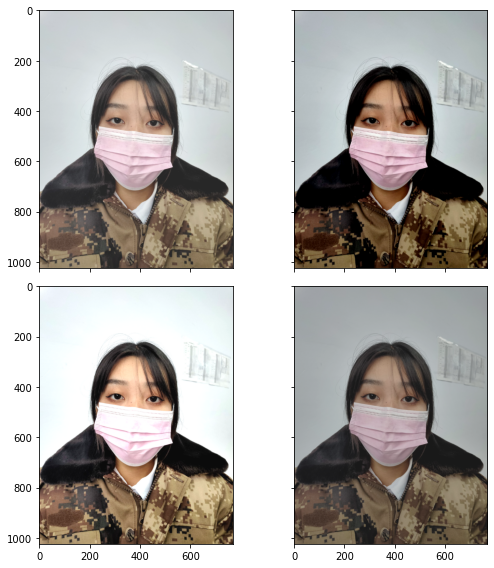

In [7]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), p=1.0),
        ], p=1.0)
for i in range(n_rows*n_cols):
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])

plt.tight_layout()

## Gaussian Noise

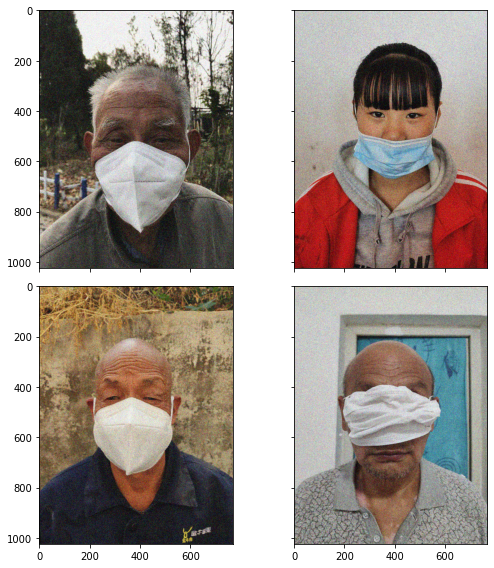

In [8]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            GaussNoise(var_limit=(1000, 1600), p=1.0),
        ], p=1.0)
random.shuffle(img_paths)
for i in range(n_rows*n_cols):
    _img = np.array(Image.open(img_paths[i]))
    axes[i%n_rows][i//n_cols].imshow(trfm(image=_img)['image'])

plt.tight_layout()

## Put All Togetehr

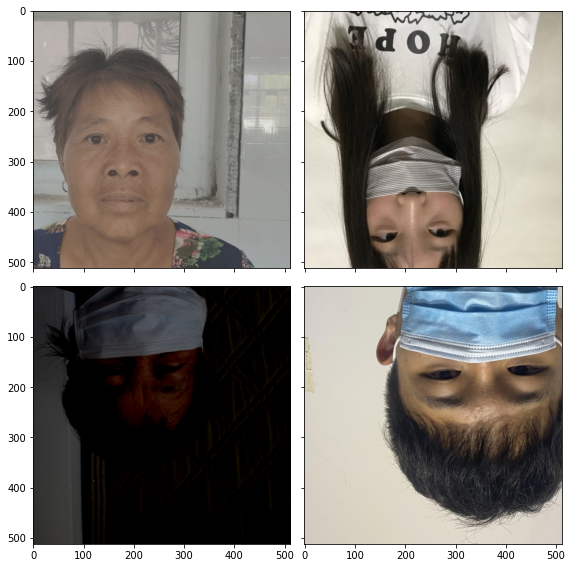

In [9]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            RandomCrop(height=512, width=512, p=1.0),
            HorizontalFlip(p=0.5),
            VerticalFlip(p=0.5),
            RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), p=0.5),
            GaussNoise(var_limit=(1000, 1600), p=0.3),
        ], p=1.0)
random.shuffle(img_paths)
for i in range(n_rows*n_cols):
    _img = np.array(Image.open(img_paths[i]))
    axes[i%n_rows][i//n_cols].imshow(trfm(image=_img)['image'])

plt.tight_layout()

# Pixel-level transforms

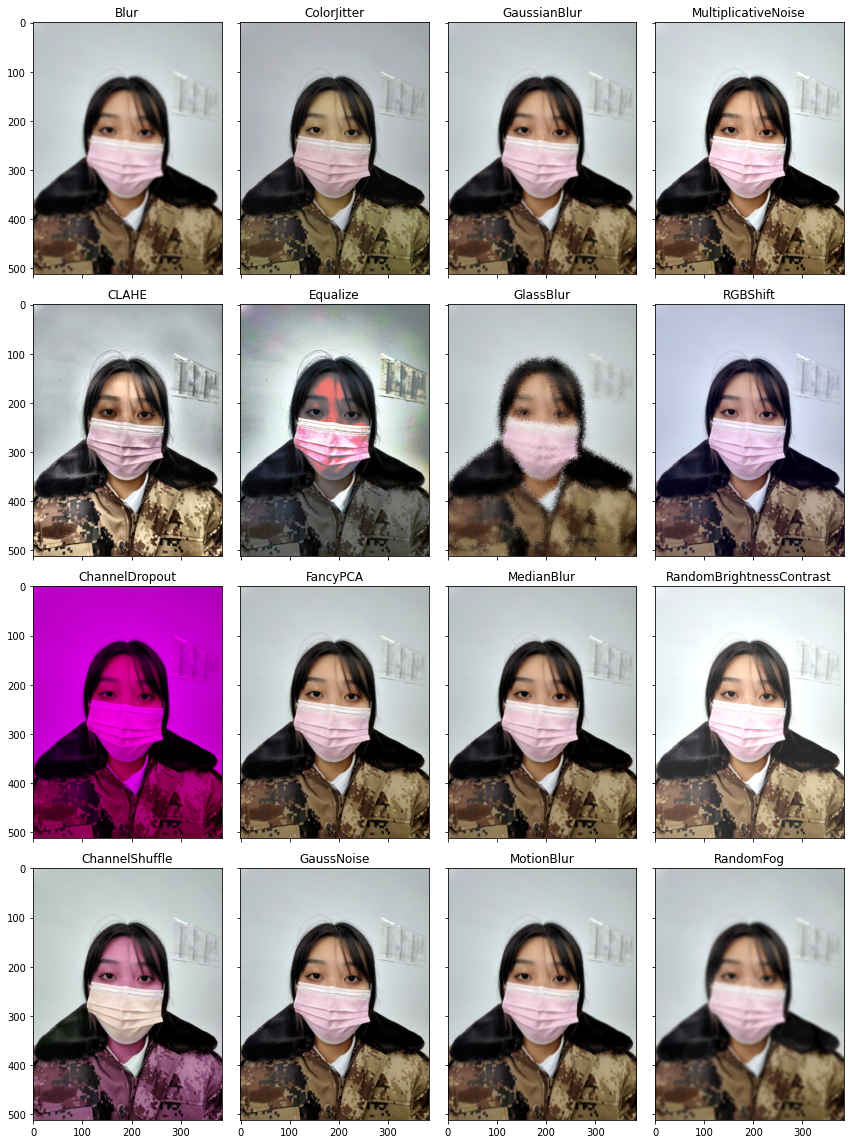

In [10]:
n_rows, n_cols = 4, 4

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(12, 16))

trfm_ls = [Blur,
           CLAHE,
           ChannelDropout,
           ChannelShuffle,
           ColorJitter,
           Equalize,
           FancyPCA,
           GaussNoise,
           GaussianBlur,
           GlassBlur,
           MedianBlur,
           MotionBlur,
           MultiplicativeNoise,
           RGBShift,
           RandomBrightnessContrast,
           RandomFog,
           Solarize]
for i in range(n_rows*n_cols):
    trfm = Compose([Resize(height=512, width=384, p=1.0), trfm_ls[i](p=1.0)])
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])
    axes[i%n_rows][i//n_cols].set_title(f'{trfm_ls[i].__name__}')

plt.tight_layout()

# Spatial-level Augmentation

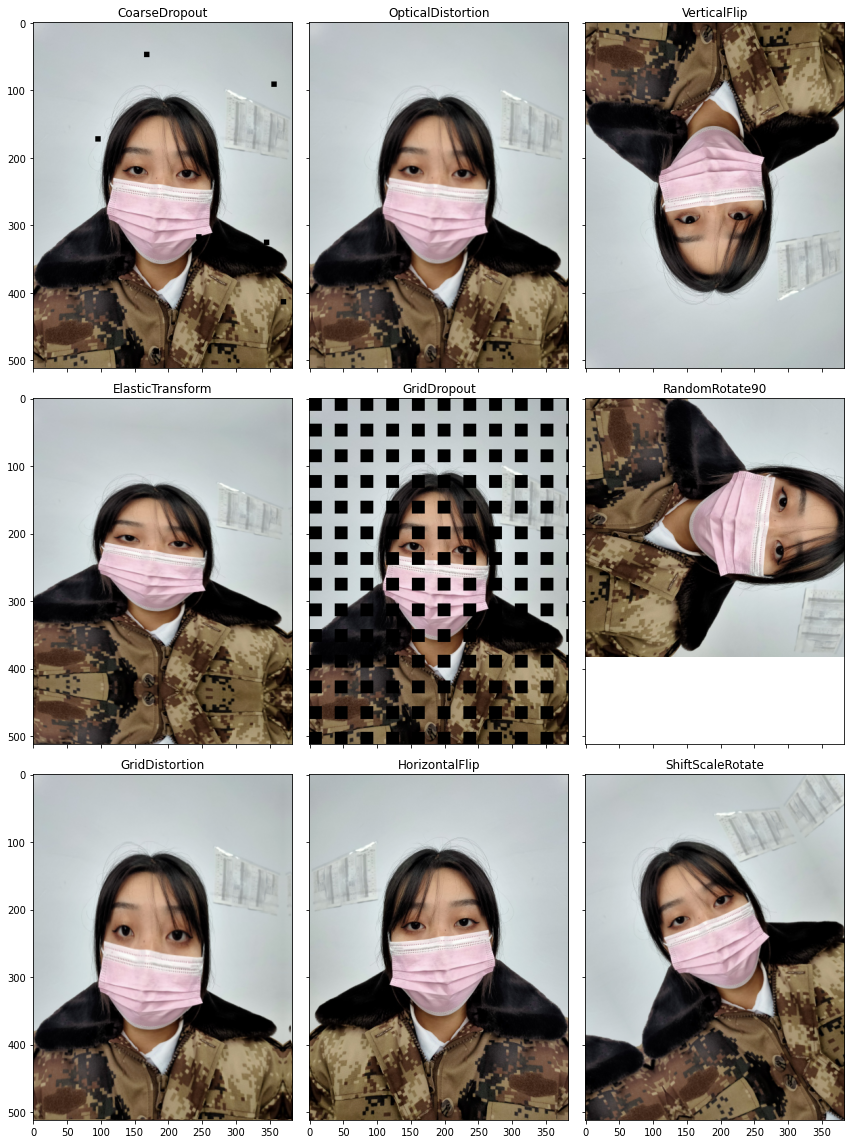

In [11]:
n_rows, n_cols = 3, 3

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(12, 16))

trfm_ls = [CoarseDropout,
           ElasticTransform,
           GridDistortion,
           OpticalDistortion,
           GridDropout,
           HorizontalFlip,
           VerticalFlip,
           RandomRotate90,
           ShiftScaleRotate]
for i in range(n_rows*n_cols):
    trfm = Compose([Resize(height=512, width=384, p=1.0), trfm_ls[i](p=1.0)])
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])
    axes[i%n_rows][i//n_cols].set_title(f'{trfm_ls[i].__name__}')

plt.tight_layout()

# Medical Image

In [12]:
med_url = 'https://prod-images-static.radiopaedia.org/images/13656005/bd937738ad6223a03f8aedcf4920a7_big_gallery.jpeg'
img = np.array(Image.open(requests.get(med_url, stream=True).raw))

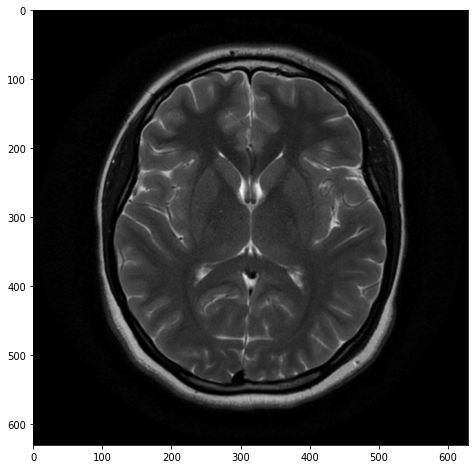

In [13]:
plt.figure(figsize=(16,8))
plt.imshow(img, cmap='gray')

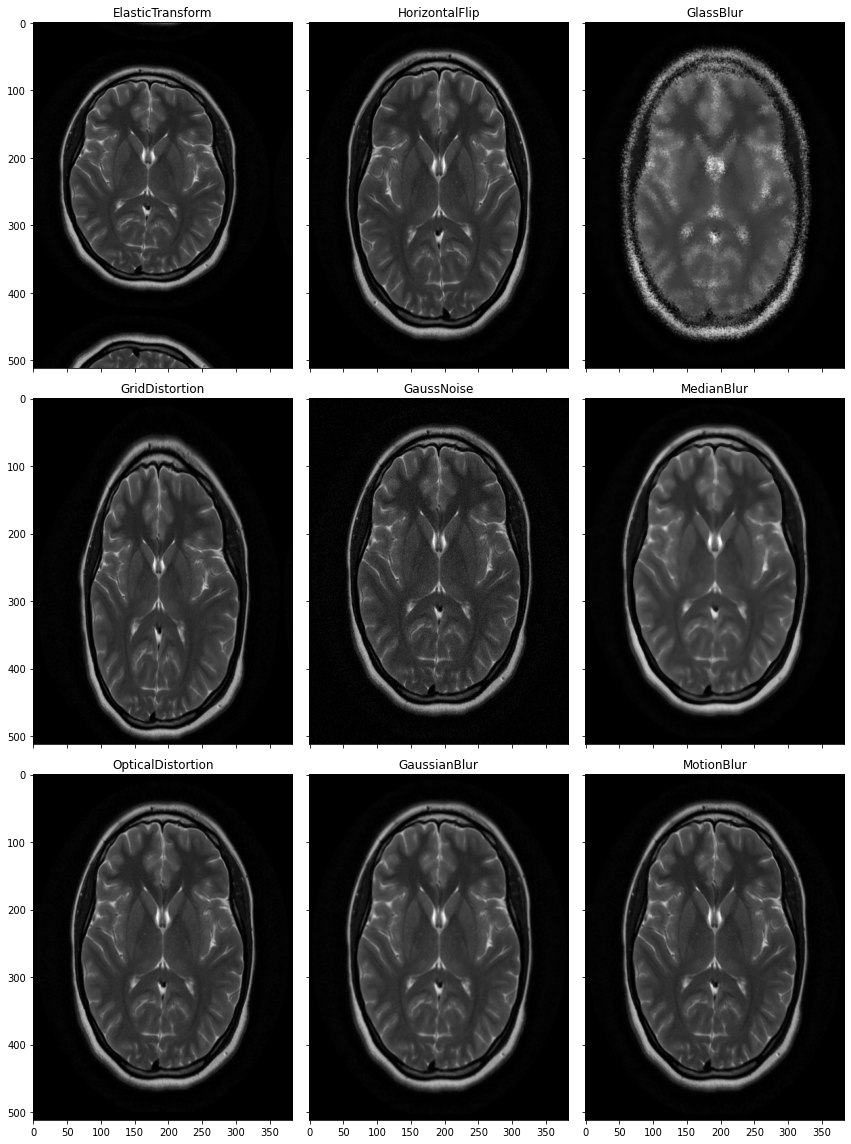

In [14]:
n_rows, n_cols = 3, 3

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(12, 16))

trfm_ls = [ElasticTransform,
           GridDistortion,
           OpticalDistortion,
           HorizontalFlip,
           GaussNoise,
           GaussianBlur,
           GlassBlur,
           MedianBlur,
           MotionBlur]
for i in range(n_rows*n_cols):
    trfm = Compose([Resize(height=512, width=384, p=1.0), trfm_ls[i](p=1.0)])
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'], cmap='gray')
    axes[i%n_rows][i//n_cols].set_title(f'{trfm_ls[i].__name__}')

plt.tight_layout()

# Reference
- [Radiopaedia](https://radiopaedia.org/cases/normal-brain-mri-6)
- [Albumentations](https://github.com/albumentations-team/albumentations)